In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('car_insurance_claim.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


## Data overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [4]:
df.describe().round(2)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.00,10295.00,10302.00,9754.00,10302.00,10302.00,10302.00,10302.00,9663.00,10302.00
mean,4.956631e+08,0.17,44.84,0.72,10.47,33.42,5.33,0.80,1.71,8.30,0.27
std,2.864675e+08,0.51,8.61,1.12,4.11,15.87,4.11,1.15,2.16,5.71,0.44
min,6.317500e+04,0.00,16.00,0.00,0.00,5.00,1.00,0.00,0.00,-3.00,0.00
25%,2.442869e+08,0.00,39.00,0.00,9.00,22.00,1.00,0.00,0.00,1.00,0.00
50%,4.970043e+08,0.00,45.00,0.00,11.00,33.00,4.00,0.00,1.00,8.00,0.00
75%,7.394551e+08,0.00,51.00,1.00,13.00,44.00,7.00,2.00,3.00,12.00,1.00
max,9.999264e+08,4.00,81.00,5.00,23.00,142.00,25.00,5.00,13.00,28.00,1.00


In [5]:
df.describe(include='O')

,BIRTH,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,CLM_AMT,URBANICITY
count,10302,9732,10302,9727,10302,10302,10302,9637,10302,10302,10302,10302,10302,10302,10302,10302
unique,6560,8151,2,6334,2,2,5,8,2,2985,6,2,3545,2,2346,2
top,20OCT60,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,$0,Highly Urban/ Urban
freq,8,797,8959,2908,6188,5545,2952,2288,6513,207,2883,7326,6292,9041,7556,8230


In [6]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [7]:
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [8]:
round(df.isna().mean()*100,2)

ID            0.00
KIDSDRIV      0.00
BIRTH         0.00
AGE           0.07
HOMEKIDS      0.00
YOJ           5.32
INCOME        5.53
PARENT1       0.00
HOME_VAL      5.58
MSTATUS       0.00
GENDER        0.00
EDUCATION     0.00
OCCUPATION    6.46
TRAVTIME      0.00
CAR_USE       0.00
BLUEBOOK      0.00
TIF           0.00
CAR_TYPE      0.00
RED_CAR       0.00
OLDCLAIM      0.00
CLM_FREQ      0.00
REVOKED       0.00
MVR_PTS       0.00
CLM_AMT       0.00
CAR_AGE       6.20
CLAIM_FLAG    0.00
URBANICITY    0.00
dtype: float64

In [9]:
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'kidsdriv', 'birth', 'age', 'homekids', 'yoj', 'income',
       'parent1', 'home_val', 'mstatus', 'gender', 'education', 'occupation',
       'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'clm_amt', 'car_age',
       'claim_flag', 'urbanicity'],
      dtype='object')

In [10]:
(df.dropna(subset= ['yoj', 'income', 'home_val', 'occupation', 'car_age']).shape[0] / df.shape[0]) * 100

74.36171245510145

In [11]:
import plotly.express as px 

In [12]:
df.yoj.mean()

np.float64(10.47370039987696)

In [13]:
df.yoj.median()

np.float64(11.0)

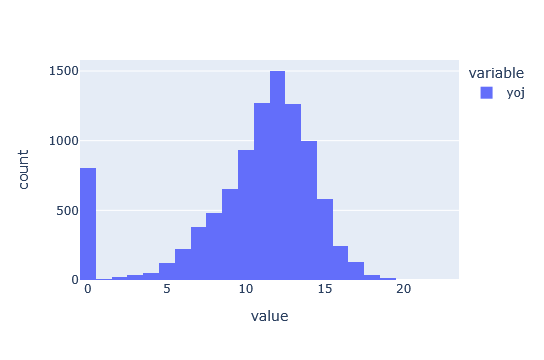

In [14]:
px.histogram(df.yoj)

In [15]:
df.occupation.value_counts()

occupation
z_Blue Collar    2288
Clerical         1590
Professional     1407
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: count, dtype: int64

In [16]:
round(df.occupation.value_counts(normalize=True)*100,2)

occupation
z_Blue Collar    23.74
Clerical         16.50
Professional     14.60
Manager          13.04
Lawyer           10.70
Student           9.33
Home Maker        8.75
Doctor            3.33
Name: proportion, dtype: float64

In [17]:
df

,id,kidsdriv,birth,age,homekids,yoj,income,parent1,home_val,mstatus,...,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10297,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10298,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [18]:
df.occupation.fillna('unknown').value_counts()

occupation
z_Blue Collar    2288
Clerical         1590
Professional     1407
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
unknown           665
Doctor            321
Name: count, dtype: int64

In [19]:
df.occupation = df.occupation.fillna('Unknown')

In [20]:
df.select_dtypes(include='O').columns

Index(['birth', 'income', 'parent1', 'home_val', 'mstatus', 'gender',
       'education', 'occupation', 'car_use', 'bluebook', 'car_type', 'red_car',
       'oldclaim', 'revoked', 'clm_amt', 'urbanicity'],
      dtype='object')

In [21]:
pd.set_option('display.max_columns',None)
df

,id,kidsdriv,birth,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10297,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,Unknown,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10298,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,<High School,z_Blue Collar,12,Private,"$13,820",7,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [22]:
cat_cols = ['birth', 'parent1', 'mstatus', 'gender',
       'education', 'occupation', 'car_use', 'car_type', 'red_car'
       , 'revoked', 'urbanicity']
print(cat_cols)

['birth', 'parent1', 'mstatus', 'gender', 'education', 'occupation', 'car_use', 'car_type', 'red_car', 'revoked', 'urbanicity']


In [23]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('\n','-'*100,'\n')

birth
6560
['16MAR39' '21JAN56' '18NOV51' ... '13AUG54' '18JUN51' '27FEB47']

 ---------------------------------------------------------------------------------------------------- 

parent1
2
['No' 'Yes']

 ---------------------------------------------------------------------------------------------------- 

mstatus
2
['z_No' 'Yes']

 ---------------------------------------------------------------------------------------------------- 

gender
2
['M' 'z_F']

 ---------------------------------------------------------------------------------------------------- 

education
5
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters']

 ---------------------------------------------------------------------------------------------------- 

occupation
9
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer'
 'Unknown' 'Home Maker' 'Student']

 ---------------------------------------------------------------------------------------------------- 

car_use
2
['Private' 'Commercial

In [24]:
remove_z_cols= ['mstatus','gender','education','occupation','car_type','urbanicity']

In [25]:
def remove_z(x):
    if ('z_')in x:
        return x.replace('z_','')
    else:
        return x
for col in remove_z_cols:
    df[col]=df[col].apply(remove_z)
df


,id,kidsdriv,birth,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",No,M,High School,Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,F,High School,Clerical,5,Private,"$4,010",4,SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10297,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,Unknown,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10298,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,F,<High School,Blue Collar,12,Private,"$13,820",7,SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [26]:
df.income

0         $67,349
1         $91,449
2         $52,881
3         $16,039
4             NaN
           ...   
10296    $164,669
10297    $107,204
10298     $39,837
10299     $43,445
10300     $53,235
Name: income, Length: 10301, dtype: object

In [27]:
num_cols = ['income', 'home_val', 'bluebook', 'oldclaim', 'clm_amt']

In [28]:
def clean_num(x):
    if type(x)==float:
        return x
    elif ('$' in x) or('m'in x):
        return x. replace('$','').replace(',','')
    else:
        return x
for col in num_cols:
    df[col]=df[col].apply(clean_num).astype(float)

In [29]:
df

,id,kidsdriv,birth,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,67790126,1,13AUG54,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10297,61970712,0,17JUN53,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,Unknown,36,Commercial,24490.0,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10298,849208064,0,18JUN51,48.0,0,15.0,39837.0,No,170611.0,Yes,F,<High School,Blue Collar,12,Private,13820.0,7,SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,627828331,0,12DEC48,50.0,0,7.0,43445.0,No,149248.0,Yes,F,Bachelors,Home Maker,36,Private,22550.0,6,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


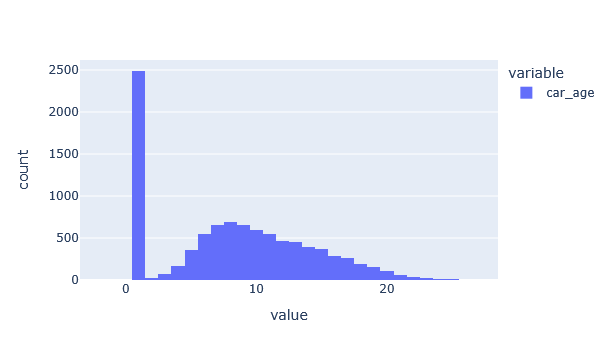

In [30]:
px.histogram(df.car_age)

In [31]:
df.car_age=df.car_age.abs()
df.car_age

0        18.0
1         1.0
2        10.0
3        10.0
4         6.0
         ... 
10296    17.0
10297     1.0
10298     1.0
10299    11.0
10300     9.0
Name: car_age, Length: 10301, dtype: float64

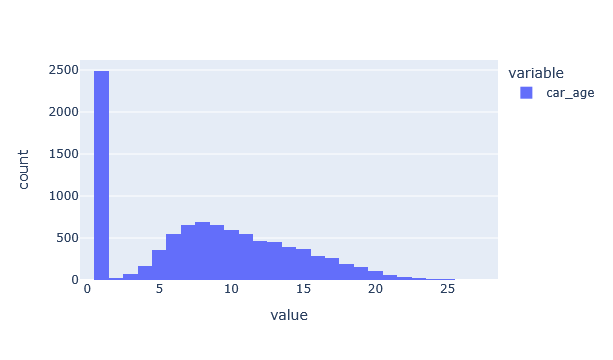

In [32]:
px.histogram(df.car_age)

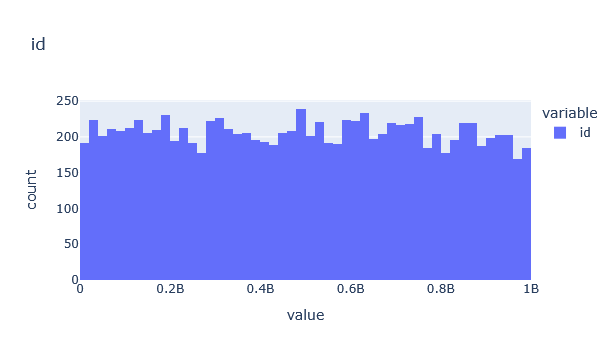

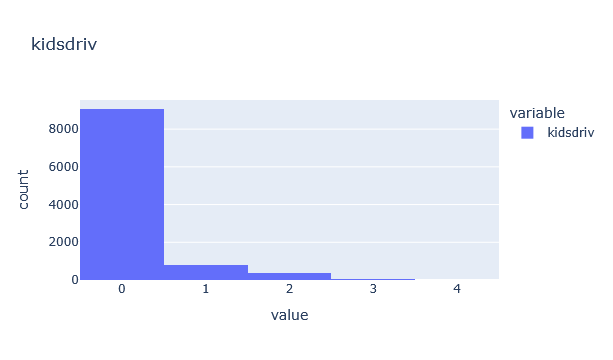

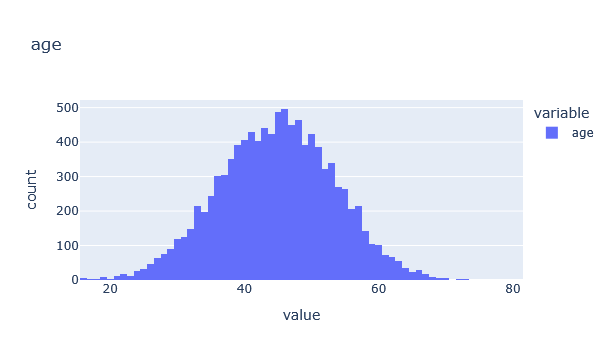

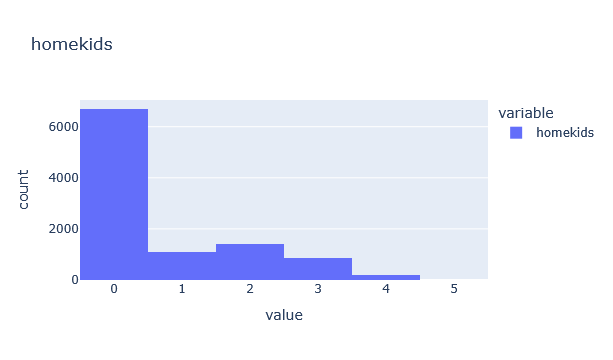

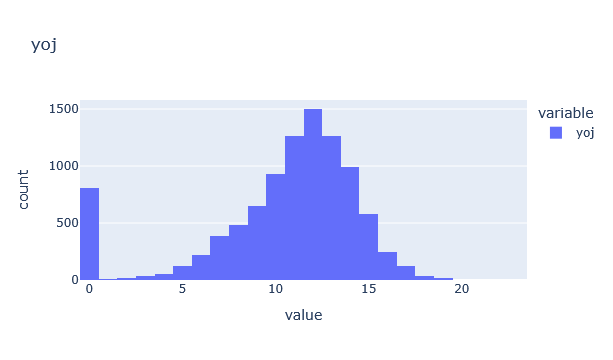

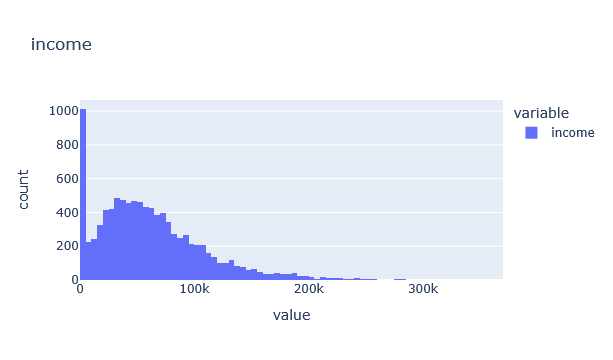

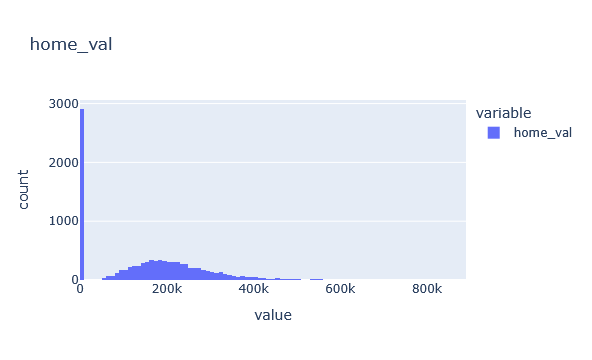

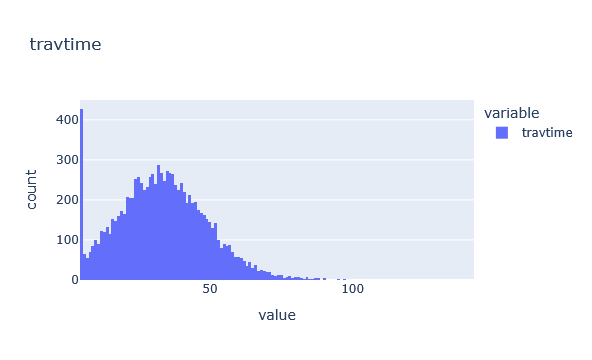

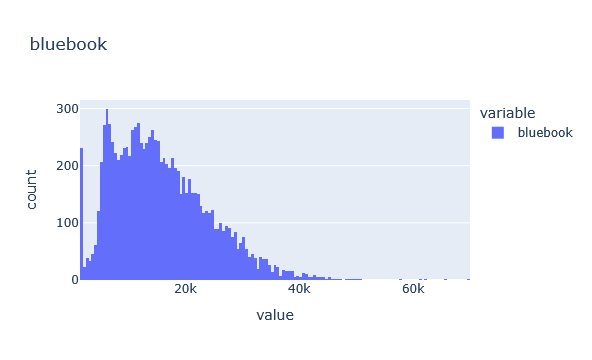

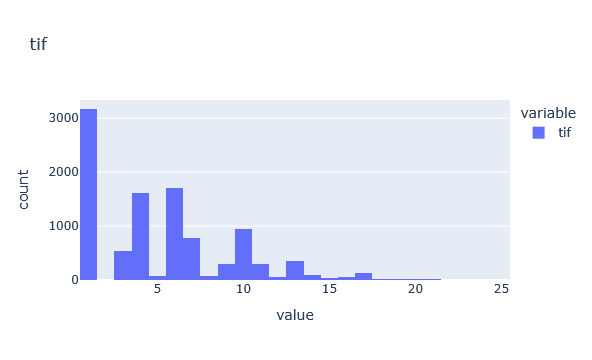

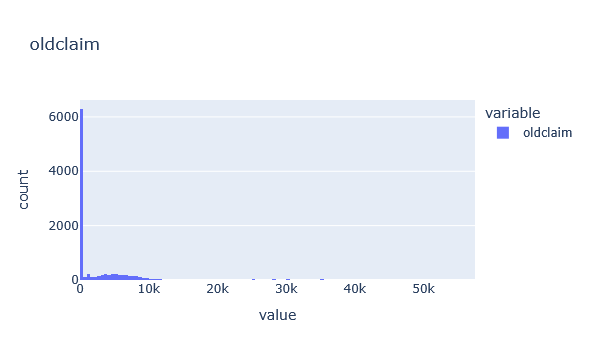

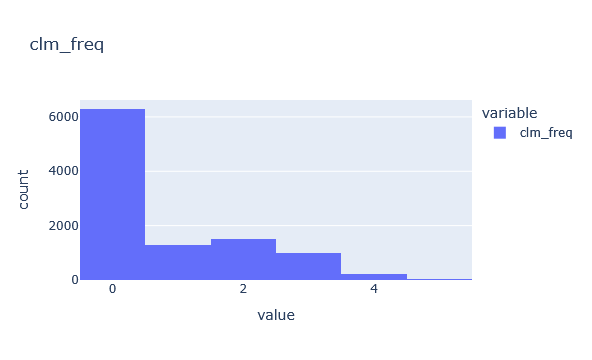

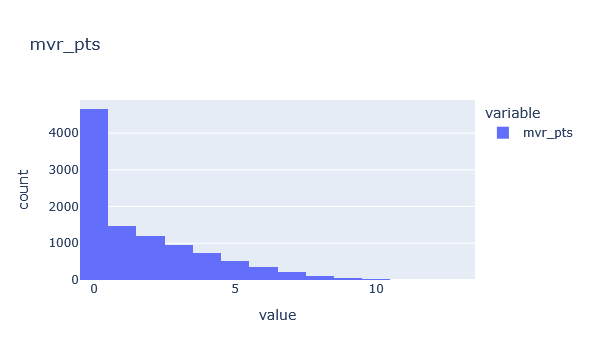

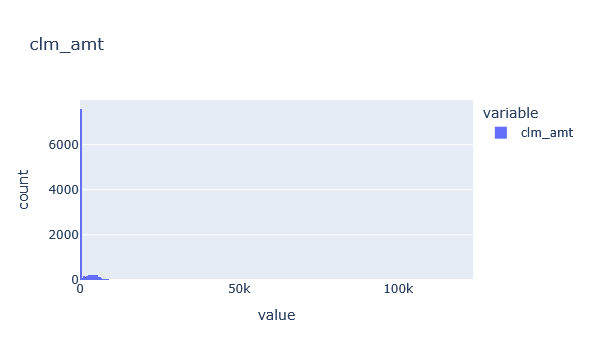

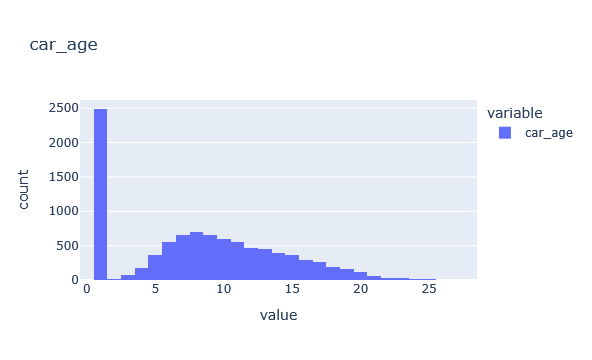

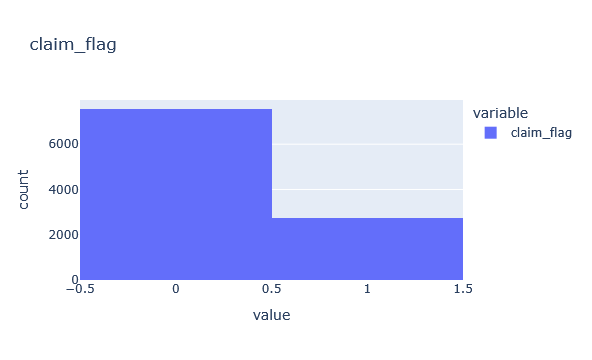

In [33]:
for col in df.select_dtypes(include=['int','float']).columns:
    px.histogram(df[col],title=col).show()

In [34]:
occu_freq=df.groupby('occupation')['clm_freq'].sum().reset_index()
occu_freq

,occupation,clm_freq
0,Blue Collar,1933
1,Clerical,1246
2,Doctor,230
3,Home Maker,613
4,Lawyer,701
5,Manager,915
6,Professional,1135
7,Student,806
8,Unknown,670


In [35]:
df.head()

,id,kidsdriv,birth,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


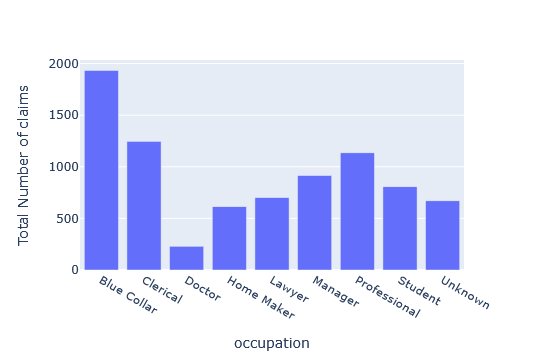

In [36]:
px.bar(occu_freq, x= 'occupation', y= 'clm_freq',
       labels= {'clm_freq' : 'Total Number of claims'})

In [37]:
# occu_freq = df.groupby('occupation')['clm_freq'].sum().sort_values(ascending= False).reset_index()
# occu_freq

In [38]:
df.columns

Index(['id', 'kidsdriv', 'birth', 'age', 'homekids', 'yoj', 'income',
       'parent1', 'home_val', 'mstatus', 'gender', 'education', 'occupation',
       'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'clm_amt', 'car_age',
       'claim_flag', 'urbanicity'],
      dtype='object')

In [39]:
car_clm=df.groupby('car_type')['oldclaim'].sum().sort_values(ascending=False).reset_index()
car_clm

,car_type,oldclaim
0,SUV,11704247.0
1,Minivan,9213471.0
2,Pickup,7141718.0
3,Sports Car,6084652.0
4,Van,4093499.0
5,Panel Truck,3320453.0


In [40]:
car_clm = df.groupby('car_type')['oldclaim'].sum().sort_values(ascending= False).reset_index()
car_clm

,car_type,oldclaim
0,SUV,11704247.0
1,Minivan,9213471.0
2,Pickup,7141718.0
3,Sports Car,6084652.0
4,Van,4093499.0
5,Panel Truck,3320453.0


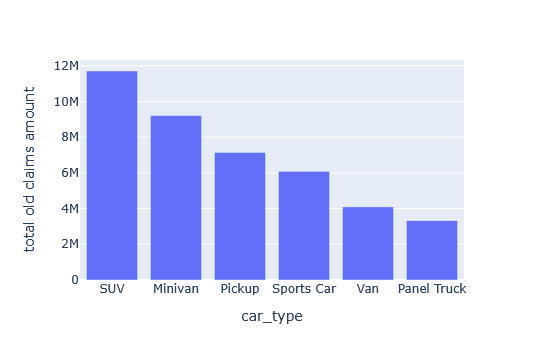

In [41]:
px.bar(car_clm,x='car_type',y='oldclaim',labels={'oldclaim': 'total old claims amount'})

In [42]:
df.select_dtypes(include=['int','float'])

,id,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,claim_flag
0,63581743,0,60.0,0,11.0,67349.0,0.0,14,14230.0,11,4461.0,2,3,0.0,18.0,0
1,132761049,0,43.0,0,11.0,91449.0,257252.0,22,14940.0,1,0.0,0,0,0.0,1.0,0
2,921317019,0,48.0,0,11.0,52881.0,0.0,26,21970.0,1,0.0,0,2,0.0,10.0,0
3,727598473,0,35.0,1,10.0,16039.0,124191.0,5,4010.0,4,38690.0,2,3,0.0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,306251.0,32,15440.0,7,0.0,0,0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,67790126,1,45.0,2,9.0,164669.0,386273.0,21,13270.0,15,0.0,0,2,0.0,17.0,0
10297,61970712,0,46.0,0,9.0,107204.0,332591.0,36,24490.0,6,0.0,0,0,0.0,1.0,0
10298,849208064,0,48.0,0,15.0,39837.0,170611.0,12,13820.0,7,0.0,0,0,0.0,1.0,0
10299,627828331,0,50.0,0,7.0,43445.0,149248.0,36,22550.0,6,0.0,0,0,0.0,11.0,0


In [43]:
df.columns

Index(['id', 'kidsdriv', 'birth', 'age', 'homekids', 'yoj', 'income',
       'parent1', 'home_val', 'mstatus', 'gender', 'education', 'occupation',
       'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'clm_amt', 'car_age',
       'claim_flag', 'urbanicity'],
      dtype='object')

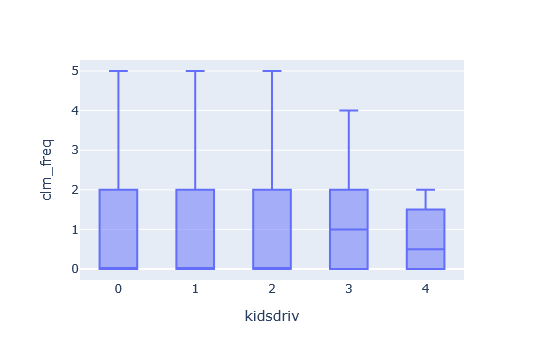

In [44]:
px.box(df,x='kidsdriv',y='clm_freq')

In [45]:
df[['kidsdriv','clm_freq']].corr()

,kidsdriv,clm_freq
kidsdriv,1.00000,0.03893
clm_freq,0.03893,1.00000


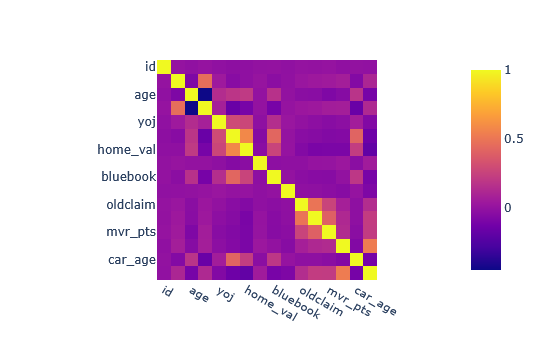

In [46]:
px.imshow(df.select_dtypes(include=['int','float']).corr())

In [47]:
df.drop(['id', 'birth'], axis= 1, inplace= True)
df

,kidsdriv,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10297,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,Unknown,36,Commercial,24490.0,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10298,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,<High School,Blue Collar,12,Private,13820.0,7,SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,Bachelors,Home Maker,36,Private,22550.0,6,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


## feature imgeneering 

In [48]:
df.tif.value_counts()

tif
1     3171
6     1707
4     1616
10     951
7      781
3      531
13     355
11     300
9      299
17     126
14      92
8       83
5       70
12      55
16      50
15      40
18      26
21      13
20      12
19      11
2        6
22       3
25       3
Name: count, dtype: int64

In [49]:
# Create a new column named loyal_cust based on years with the company
def loyal_cust(x):

    if x < 8:
        return 'New Customer'
    
    elif x < 15:
        return 'Loyal Customer'
    
    else:
        return 'Very Loyal Customer'
    
df.tif.apply(loyal_cust).value_counts()

tif
New Customer           7882
Loyal Customer         2135
Very Loyal Customer     284
Name: count, dtype: int64

In [50]:
df['customer_loyalty'] = df.tif.apply(loyal_cust)
df['customer_loyalty'] 

0             Loyal Customer
1               New Customer
2               New Customer
3               New Customer
4               New Customer
                ...         
10296    Very Loyal Customer
10297           New Customer
10298           New Customer
10299           New Customer
10300           New Customer
Name: customer_loyalty, Length: 10301, dtype: object

## Data Preprocessing

In [51]:
df.head()

,kidsdriv,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity,customer_loyalty
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban,Loyal Customer
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban,New Customer
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban,New Customer
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban,New Customer
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban,New Customer


In [52]:
round(df.isna().mean()*100,2)

kidsdriv            0.00
age                 0.07
homekids            0.00
yoj                 5.32
income              5.53
parent1             0.00
home_val            5.58
mstatus             0.00
gender              0.00
education           0.00
occupation          0.00
travtime            0.00
car_use             0.00
bluebook            0.00
tif                 0.00
car_type            0.00
red_car             0.00
oldclaim            0.00
clm_freq            0.00
revoked             0.00
mvr_pts             0.00
clm_amt             0.00
car_age             6.20
claim_flag          0.00
urbanicity          0.00
customer_loyalty    0.00
dtype: float64

In [53]:
df.isnull().sum().sum() / df.size * 100

np.float64(0.8733282056260407)

In [54]:
df.dropna(subset=['age'],ignore_index=True,inplace=True)

In [55]:
df.dropna()

,kidsdriv,age,homekids,yoj,income,parent1,home_val,mstatus,gender,education,occupation,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,clm_amt,car_age,claim_flag,urbanicity,customer_loyalty
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban,Loyal Customer
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban,New Customer
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban,New Customer
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban,New Customer
6,0,34.0,1,12.0,125301.0,Yes,0.0,No,F,Bachelors,Blue Collar,46,Commercial,17430.0,1,Sports Car,no,0.0,0,No,0,2946.0,7.0,1,Highly Urban/ Urban,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban,Very Loyal Customer
10290,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,Unknown,36,Commercial,24490.0,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban,New Customer
10291,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,<High School,Blue Collar,12,Private,13820.0,7,SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban,New Customer
10292,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,Bachelors,Home Maker,36,Private,22550.0,6,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban,New Customer


In [56]:
df.dropna().isna().shape[0]/df.shape[0]*100

79.28890615892753

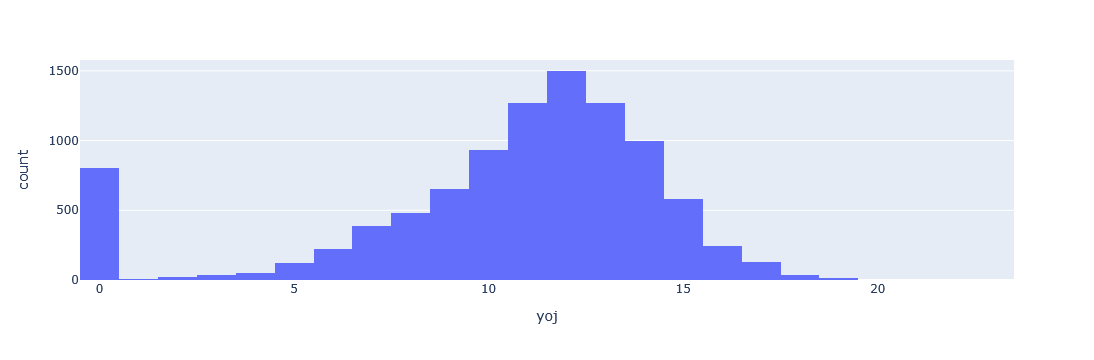

In [57]:
import plotly.express as px 
px.histogram(df,x='yoj')

In [58]:
df.yoj.mean()

np.float64(10.478247486148163)

In [59]:
df.yoj.median()

np.float64(11.0)

In [60]:
from sklearn.impute import SimpleImputer,KNNImputer
# sum_impute=SimpleImputer(strategy='median')
# df[['yoj','car_age']]=sum_impute.fit_transform(df[['yoj','car_age']])
# df[['yoj','car_age']]

In [61]:
df.isna().sum()

kidsdriv              0
age                   0
homekids              0
yoj                 548
income              569
parent1               0
home_val            573
mstatus               0
gender                0
education             0
occupation            0
travtime              0
car_use               0
bluebook              0
tif                   0
car_type              0
red_car               0
oldclaim              0
clm_freq              0
revoked               0
mvr_pts               0
clm_amt               0
car_age             639
claim_flag            0
urbanicity            0
customer_loyalty      0
dtype: int64

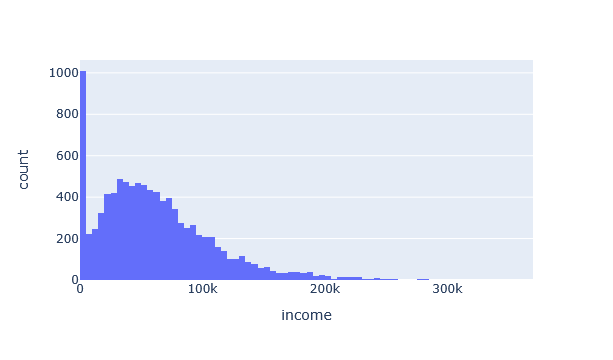

In [62]:
px.histogram(df,x='income')

In [63]:
# knn=KNNImputer()
# df[['income','home_val']]=knn.fit_transform(df[['income','home_val']])
# df[['income','home_val']]

In [64]:
df.columns

Index(['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'parent1', 'home_val',
       'mstatus', 'gender', 'education', 'occupation', 'travtime', 'car_use',
       'bluebook', 'tif', 'car_type', 'red_car', 'oldclaim', 'clm_freq',
       'revoked', 'mvr_pts', 'clm_amt', 'car_age', 'claim_flag', 'urbanicity',
       'customer_loyalty'],
      dtype='object')

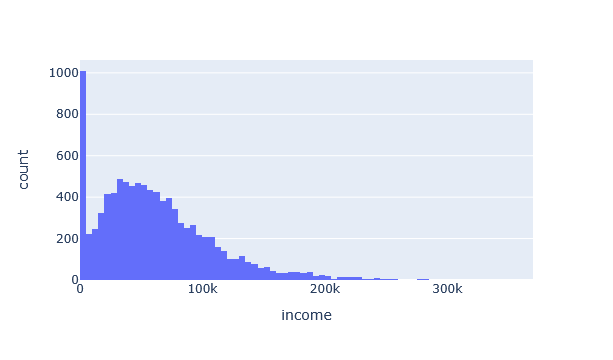

In [65]:
px.histogram(df,x='income')

## handling categorical Data

In [66]:
df.education.unique()

array(['PhD', 'High School', 'Bachelors', '<High School', 'Masters'],
      dtype=object)

In [67]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[['<High School', 'High School', 'Bachelors', 'Masters', 'PhD']])
df['education']=ord.fit_transform(df[['education']])


In [68]:
df['education']

0        4.0
1        1.0
2        2.0
3        1.0
4        0.0
        ... 
10289    4.0
10290    3.0
10291    0.0
10292    2.0
10293    1.0
Name: education, Length: 10294, dtype: float64

In [69]:
df['education']

0        4.0
1        1.0
2        2.0
3        1.0
4        0.0
        ... 
10289    4.0
10290    3.0
10291    0.0
10292    2.0
10293    1.0
Name: education, Length: 10294, dtype: float64

In [70]:
for col in df.select_dtypes(include='O'):
    print(col)
    print(df[col].nunique())

parent1
2
mstatus
2
gender
2
occupation
9
car_use
2
car_type
6
red_car
2
revoked
2
urbanicity
2
customer_loyalty
3


In [71]:
df.select_dtypes(include='O')

,parent1,mstatus,gender,occupation,car_use,car_type,red_car,revoked,urbanicity,customer_loyalty
0,No,No,M,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,Loyal Customer
1,No,No,M,Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,New Customer
2,No,No,M,Manager,Private,Van,yes,No,Highly Urban/ Urban,New Customer
3,No,Yes,F,Clerical,Private,SUV,no,No,Highly Urban/ Urban,New Customer
4,No,Yes,M,Blue Collar,Private,Minivan,yes,No,Highly Urban/ Urban,New Customer
...,...,...,...,...,...,...,...,...,...,...
10289,No,Yes,M,Manager,Private,Minivan,no,No,Highly Urban/ Urban,Very Loyal Customer
10290,No,Yes,M,Unknown,Commercial,Panel Truck,no,No,Highly Urban/ Urban,New Customer
10291,No,Yes,F,Blue Collar,Private,SUV,no,No,Highly Urban/ Urban,New Customer
10292,No,Yes,F,Home Maker,Private,Minivan,no,No,Highly Urban/ Urban,New Customer


In [72]:
cat_col=df.select_dtypes(include='O').drop('occupation',axis=1).columns
cat_col

Index(['parent1', 'mstatus', 'gender', 'car_use', 'car_type', 'red_car',
       'revoked', 'urbanicity', 'customer_loyalty'],
      dtype='object')

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)
ohe_arr=ohe.fit_transform(df[cat_col])

In [74]:
ohe_df=pd.DataFrame(
    ohe_arr,columns=ohe.get_feature_names_out()
)

In [75]:
df=pd.concat([df,ohe_df],axis=1).drop(cat_col,axis=1)


In [76]:
df

,kidsdriv,age,homekids,yoj,income,home_val,education,occupation,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,claim_flag,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
0,0,60.0,0,11.0,67349.0,0.0,4.0,Professional,14,14230.0,11,4461.0,2,3,0.0,18.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,43.0,0,11.0,91449.0,257252.0,1.0,Blue Collar,22,14940.0,1,0.0,0,0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,48.0,0,11.0,52881.0,0.0,2.0,Manager,26,21970.0,1,0.0,0,2,0.0,10.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0,35.0,1,10.0,16039.0,124191.0,1.0,Clerical,5,4010.0,4,38690.0,2,3,0.0,10.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,51.0,0,14.0,NaN,306251.0,0.0,Blue Collar,32,15440.0,7,0.0,0,0,0.0,6.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,45.0,2,9.0,164669.0,386273.0,4.0,Manager,21,13270.0,15,0.0,0,2,0.0,17.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10290,0,46.0,0,9.0,107204.0,332591.0,3.0,Unknown,36,24490.0,6,0.0,0,0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10291,0,48.0,0,15.0,39837.0,170611.0,0.0,Blue Collar,12,13820.0,7,0.0,0,0,0.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10292,0,50.0,0,7.0,43445.0,149248.0,2.0,Home Maker,36,22550.0,6,0.0,0,0,0.0,11.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
df.occupation.head(50)

0     Professional
1      Blue Collar
2          Manager
3         Clerical
4      Blue Collar
5           Doctor
6      Blue Collar
7      Blue Collar
8          Manager
9      Blue Collar
10     Blue Collar
11        Clerical
12    Professional
13          Lawyer
14    Professional
15         Manager
16         Unknown
17        Clerical
18      Home Maker
19        Clerical
20         Manager
21          Lawyer
22          Lawyer
23        Clerical
24     Blue Collar
25     Blue Collar
26          Lawyer
27     Blue Collar
28      Home Maker
29    Professional
30     Blue Collar
31    Professional
32        Clerical
33         Manager
34        Clerical
35      Home Maker
36     Blue Collar
37        Clerical
38     Blue Collar
39    Professional
40         Unknown
41     Blue Collar
42      Home Maker
43          Doctor
44        Clerical
45         Unknown
46          Doctor
47          Doctor
48         Student
49         Student
Name: occupation, dtype: object

In [78]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
be_df=be.fit_transform(df[['occupation']])
be_df

,occupation_0,occupation_1,occupation_2,occupation_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
10289,0,0,1,1
10290,0,1,1,1
10291,0,0,1,0
10292,1,0,0,0


In [79]:
pd.concat([df,be_df],axis=1)

,kidsdriv,age,homekids,yoj,income,home_val,education,occupation,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,claim_flag,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer,occupation_0,occupation_1,occupation_2,occupation_3
0,0,60.0,0,11.0,67349.0,0.0,4.0,Professional,14,14230.0,11,4461.0,2,3,0.0,18.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1
1,0,43.0,0,11.0,91449.0,257252.0,1.0,Blue Collar,22,14940.0,1,0.0,0,0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,1,0
2,0,48.0,0,11.0,52881.0,0.0,2.0,Manager,26,21970.0,1,0.0,0,2,0.0,10.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0,0,1,1
3,0,35.0,1,10.0,16039.0,124191.0,1.0,Clerical,5,4010.0,4,38690.0,2,3,0.0,10.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0
4,0,51.0,0,14.0,NaN,306251.0,0.0,Blue Collar,32,15440.0,7,0.0,0,0,0.0,6.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,45.0,2,9.0,164669.0,386273.0,4.0,Manager,21,13270.0,15,0.0,0,2,0.0,17.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,1
10290,0,46.0,0,9.0,107204.0,332591.0,3.0,Unknown,36,24490.0,6,0.0,0,0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,1,1
10291,0,48.0,0,15.0,39837.0,170611.0,0.0,Blue Collar,12,13820.0,7,0.0,0,0,0.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,1,0
10292,0,50.0,0,7.0,43445.0,149248.0,2.0,Home Maker,36,22550.0,6,0.0,0,0,0.0,11.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0


In [80]:
df.drop('occupation',axis=1,inplace=True)

In [81]:
df.columns

Index(['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'home_val', 'education',
       'travtime', 'bluebook', 'tif', 'oldclaim', 'clm_freq', 'mvr_pts',
       'clm_amt', 'car_age', 'claim_flag', 'parent1_Yes', 'mstatus_Yes',
       'gender_M', 'car_use_Private', 'car_type_Panel Truck',
       'car_type_Pickup', 'car_type_SUV', 'car_type_Sports Car',
       'car_type_Van', 'red_car_yes', 'revoked_Yes',
       'urbanicity_Highly Urban/ Urban', 'customer_loyalty_New Customer',
       'customer_loyalty_Very Loyal Customer'],
      dtype='object')

In [82]:
x=df.drop('claim_flag',axis=1)
y=df['claim_flag']

In [83]:
x

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
0,0,60.0,0,11.0,67349.0,0.0,4.0,14,14230.0,11,4461.0,2,3,0.0,18.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,43.0,0,11.0,91449.0,257252.0,1.0,22,14940.0,1,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,48.0,0,11.0,52881.0,0.0,2.0,26,21970.0,1,0.0,0,2,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0,35.0,1,10.0,16039.0,124191.0,1.0,5,4010.0,4,38690.0,2,3,0.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,51.0,0,14.0,NaN,306251.0,0.0,32,15440.0,7,0.0,0,0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,45.0,2,9.0,164669.0,386273.0,4.0,21,13270.0,15,0.0,0,2,0.0,17.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10290,0,46.0,0,9.0,107204.0,332591.0,3.0,36,24490.0,6,0.0,0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10291,0,48.0,0,15.0,39837.0,170611.0,0.0,12,13820.0,7,0.0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10292,0,50.0,0,7.0,43445.0,149248.0,2.0,36,22550.0,6,0.0,0,0,0.0,11.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [84]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10289    0
10290    0
10291    0
10292    0
10293    0
Name: claim_flag, Length: 10294, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [86]:
x_train

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
7011,0,39.0,0,10.0,116247.0,0.0,2.0,25,1500.0,13,0.0,0,2,4168.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2382,0,37.0,0,9.0,62409.0,217421.0,1.0,55,11440.0,10,0.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2950,0,36.0,1,NaN,NaN,194096.0,0.0,50,14730.0,6,0.0,0,1,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4746,2,45.0,3,14.0,4910.0,0.0,0.0,12,17450.0,1,0.0,0,0,5470.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8662,0,65.0,0,15.0,68304.0,253131.0,4.0,39,28440.0,4,0.0,0,1,0.0,11.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0,47.0,0,12.0,54319.0,217348.0,1.0,51,14770.0,4,0.0,0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
71,0,32.0,3,14.0,54968.0,146784.0,1.0,20,10040.0,4,0.0,0,0,0.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8087,0,24.0,1,10.0,9761.0,92374.0,2.0,66,11320.0,10,14584.0,2,10,2009.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
7607,0,43.0,0,12.0,NaN,0.0,4.0,42,13520.0,13,22305.0,3,0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
x_test

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
2318,2,36.0,3,13.0,8615.0,72501.0,1.0,41,20150.0,1,0.0,0,0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3239,0,45.0,3,11.0,207123.0,488301.0,4.0,42,34320.0,1,583.0,4,3,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5560,0,52.0,0,0.0,0.0,105539.0,2.0,70,15070.0,1,0.0,0,0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10001,0,57.0,0,0.0,0.0,0.0,1.0,37,12540.0,4,25429.0,2,0,1425.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8450,0,51.0,0,12.0,55657.0,204828.0,2.0,41,20030.0,9,21745.0,1,4,0.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,0,67.0,0,15.0,53714.0,209432.0,2.0,27,21810.0,1,2049.0,1,0,0.0,13.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9685,0,57.0,0,14.0,76123.0,265089.0,3.0,31,18970.0,4,39529.0,3,2,0.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3269,0,43.0,1,8.0,110543.0,330562.0,3.0,48,14110.0,9,0.0,0,0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1144,0,61.0,0,14.0,52529.0,183779.0,3.0,66,12850.0,7,0.0,0,0,0.0,11.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
y_train.value_counts(normalize=True).round(2)*100

claim_flag
0    73.0
1    27.0
Name: proportion, dtype: float64

In [89]:
y_test.value_counts(normalize=True).round(2)*100

claim_flag
0    73.0
1    27.0
Name: proportion, dtype: float64

In [90]:
x_train.isna().sum()

kidsdriv                                  0
age                                       0
homekids                                  0
yoj                                     440
income                                  454
home_val                                440
education                                 0
travtime                                  0
bluebook                                  0
tif                                       0
oldclaim                                  0
clm_freq                                  0
mvr_pts                                   0
clm_amt                                   0
car_age                                 522
parent1_Yes                               0
mstatus_Yes                               0
gender_M                                  0
car_use_Private                           0
car_type_Panel Truck                      0
car_type_Pickup                           0
car_type_SUV                              0
car_type_Sports Car             

In [91]:
simple_imputer=SimpleImputer(strategy='median')
x_train[['yoj','car_age']]=simple_imputer.fit_transform(x_train[['yoj','car_age']])
x_test[['yoj','car_age']]=simple_imputer.transform(x_test[['yoj','car_age']])

In [92]:
x_train.isna().sum()

kidsdriv                                  0
age                                       0
homekids                                  0
yoj                                       0
income                                  454
home_val                                440
education                                 0
travtime                                  0
bluebook                                  0
tif                                       0
oldclaim                                  0
clm_freq                                  0
mvr_pts                                   0
clm_amt                                   0
car_age                                   0
parent1_Yes                               0
mstatus_Yes                               0
gender_M                                  0
car_use_Private                           0
car_type_Panel Truck                      0
car_type_Pickup                           0
car_type_SUV                              0
car_type_Sports Car             

In [93]:
knn=KNNImputer()
x_train[['income','home_val']]=knn.fit_transform(x_train[['income','home_val']])
x_test[['income','home_val']]=knn.transform(x_test[['income','home_val']])


In [94]:
x_train.isna().sum()

kidsdriv                                0
age                                     0
homekids                                0
yoj                                     0
income                                  0
home_val                                0
education                               0
travtime                                0
bluebook                                0
tif                                     0
oldclaim                                0
clm_freq                                0
mvr_pts                                 0
clm_amt                                 0
car_age                                 0
parent1_Yes                             0
mstatus_Yes                             0
gender_M                                0
car_use_Private                         0
car_type_Panel Truck                    0
car_type_Pickup                         0
car_type_SUV                            0
car_type_Sports Car                     0
car_type_Van                      

In [95]:
# 🔹 1. MinMaxScaler

# بيحوّل القيم لمجال (Range) معين.

# الافتراضي: من 0 إلى 1، لكن ممكن تغيّره زي: (-3, 3) أو (-1, 1).

# ✅ مميزاته:

# بيحافظ على شكل التوزيع (مش بيغيره).

# مفيد لو البيانات ليها حدود معروفة.

# ❌ عيوبه:

# حساس جدًا للـ Outliers (القيم الشاذة).

In [96]:
# 🔹 2. StandardScaler

# بيحوّل القيم بحيث يكون عندها:

# متوسط = 0

# انحراف معياري = 1
# مش حساس زي MinMaxScaler في وجود Outliers (لكن لسه بيتأثر).

# لو القيم محدودة ومقيدة → تقدر تستخدم MinMaxScaler عشان تديها Range مناسب (زي 0–1 أو -1–1).

# لو القيم مفتوحة وبدون حدود واضحة → غالبًا StandardScaler هيبقى أنسب.

In [97]:
# 🔹 Normal Distribution (التوزيع الطبيعي)

# هو شكل الجرس المعروف (Bell Curve).

# أي بيانات ممكن تكون Normal لو بتتوزع حوالي المتوسط.

# بيتميز بحاجتين:

# المتوسط (µ): بيحدد مكان منتصف التوزيع.

# الانحراف المعياري (σ): بيحدد درجة تشتت القيم (هل التوزيع عريض ولا ضيق).



In [98]:
# 🔹 Standard Normal Distribution

# ده حالة خاصة من الـ Normal Distribution.

# ببساطة: Normal Distribution لكن بعد ما نعمله Standardization.

# يعني:

# المتوسط (µ) = 0

# الانحراف المعياري (σ) = 1

In [99]:
# RobustScaler بيعمل Scaling للبيانات باستخدام الميديان (Median) و الـ IQR (Interquartile Range) بدل المتوسط والانحراف المعياري.

# الهدف: يبقى أقل حساسية للـ Outliers.

In [100]:
# لو عندك بيانات فيها Outliers ومش عايز تمسحهم → استخدم RobustScaler.

# لو البيانات نظيفة أو شبه طبيعية → StandardScaler أفضل.

# لو البيانات محدودة بنطاق ثابت → MinMaxScaler أنسب.

In [101]:
x_train.columns

Index(['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'home_val', 'education',
       'travtime', 'bluebook', 'tif', 'oldclaim', 'clm_freq', 'mvr_pts',
       'clm_amt', 'car_age', 'parent1_Yes', 'mstatus_Yes', 'gender_M',
       'car_use_Private', 'car_type_Panel Truck', 'car_type_Pickup',
       'car_type_SUV', 'car_type_Sports Car', 'car_type_Van', 'red_car_yes',
       'revoked_Yes', 'urbanicity_Highly Urban/ Urban',
       'customer_loyalty_New Customer',
       'customer_loyalty_Very Loyal Customer'],
      dtype='object')

In [102]:
num_col=['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'home_val', 'education',
       'travtime', 'bluebook', 'tif', 'oldclaim', 'clm_freq', 'mvr_pts',
       'clm_amt', 'car_age']

In [103]:
x_train.head()

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
7011,0,39.0,0,10.0,116247.0,0.0,2.0,25,1500.0,13,0.0,0,2,4168.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2382,0,37.0,0,9.0,62409.0,217421.0,1.0,55,11440.0,10,0.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2950,0,36.0,1,11.0,59465.4,194096.0,0.0,50,14730.0,6,0.0,0,1,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4746,2,45.0,3,14.0,4910.0,0.0,0.0,12,17450.0,1,0.0,0,0,5470.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8662,0,65.0,0,15.0,68304.0,253131.0,4.0,39,28440.0,4,0.0,0,1,0.0,11.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

min_max=MinMaxScaler()
min_max.fit_transform(x_train[num_col])

array([[0.        , 0.35384615, 0.        , ..., 0.15384615, 0.03381827,
        0.28571429],
       [0.        , 0.32307692, 0.        , ..., 0.07692308, 0.        ,
        0.03571429],
       [0.        , 0.30769231, 0.2       , ..., 0.07692308, 0.        ,
        0.25      ],
       ...,
       [0.        , 0.12307692, 0.2       , ..., 0.76923077, 0.0163006 ,
        0.        ],
       [0.        , 0.41538462, 0.        , ..., 0.        , 0.        ,
        0.53571429],
       [0.        , 0.70769231, 0.        , ..., 0.30769231, 0.        ,
        0.28571429]], shape=(8235, 15))

In [105]:
sd=StandardScaler()
sd.fit_transform(x_train[num_col])

array([[-0.33507241, -0.67876983, -0.64542509, ...,  0.12869902,
         0.53988041, -0.04681145],
       [-0.33507241, -0.91196422, -0.64542509, ..., -0.33109986,
        -0.31175084, -1.32690922],
       [-0.33507241, -1.02856141,  0.24951945, ..., -0.33109986,
        -0.31175084, -0.22968256],
       ...,
       [-0.33507241, -2.42772776,  0.24951945, ...,  3.80709   ,
         0.09874033, -1.50978033],
       [-0.33507241, -0.21238105, -0.64542509, ..., -0.79089873,
        -0.31175084,  1.23328631],
       [-0.33507241,  2.00296566, -0.64542509, ...,  1.04829676,
        -0.31175084, -0.04681145]], shape=(8235, 15))

In [106]:
Rs=RobustScaler()
x_train[num_col]=Rs.fit_transform(x_train[num_col])

In [107]:
x_train

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
7011,0.0,-0.500000,0.0,-0.25,1.097695,-0.676095,0.0,-0.363636,-1.099405,1.500000,0.000000,0.0,0.333333,3.681979,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2382,0.0,-0.666667,0.0,-0.50,0.144675,0.243454,-0.5,1.000000,-0.254885,1.000000,0.000000,0.0,0.000000,0.000000,-0.875,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2950,0.0,-0.750000,1.0,0.00,0.092569,0.144804,-1.0,0.772727,0.024639,0.333333,0.000000,0.0,0.000000,0.000000,-0.125,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4746,2.0,0.000000,3.0,0.75,-0.873150,-0.676095,-1.0,-0.954545,0.255735,-0.500000,0.000000,0.0,-0.333333,4.832155,-0.875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8662,0.0,1.666667,0.0,1.00,0.249026,0.394484,1.0,0.272727,1.189465,0.000000,0.000000,0.0,0.000000,0.000000,0.375,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,0.0,0.166667,0.0,0.25,0.001469,0.243145,-0.5,0.818182,0.028037,0.000000,0.000000,0.0,0.333333,0.000000,-0.875,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
71,0.0,-1.083333,3.0,0.75,0.012958,-0.055295,-0.5,-0.590909,-0.373832,0.000000,0.000000,0.0,-0.333333,0.000000,0.000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
8087,0.0,-1.750000,1.0,-0.25,-0.787280,-0.285413,0.0,1.500000,-0.265081,1.000000,3.165274,1.0,3.000000,1.774735,-1.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
7607,0.0,-0.166667,0.0,0.25,0.359428,-0.676095,1.0,0.409091,-0.078165,1.500000,4.841020,1.5,-0.333333,0.000000,0.875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
x_test[num_col]=Rs.transform(x_test[num_col])

In [109]:
x_test

,kidsdriv,age,homekids,yoj,income,home_val,education,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,clm_amt,car_age,parent1_Yes,mstatus_Yes,gender_M,car_use_Private,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_yes,revoked_Yes,urbanicity_Highly Urban/ Urban,customer_loyalty_New Customer,customer_loyalty_Very Loyal Customer
2318,2.0,-0.750000,3.0,0.50,-0.807566,-0.369463,-0.5,0.363636,0.485132,-0.500000,0.000000,0.0,-0.333333,0.000000,-0.250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3239,0.0,0.000000,3.0,0.00,2.706348,1.389100,1.0,0.409091,1.689040,-0.500000,0.126533,2.0,0.666667,0.000000,-0.375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5560,0.0,0.583333,0.0,-2.75,-0.960065,-0.229734,0.0,1.681818,0.053526,-0.500000,0.000000,0.0,-0.333333,0.000000,0.500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10001,0.0,1.000000,0.0,-2.75,-0.960065,-0.676095,-0.5,0.181818,-0.161427,0.000000,5.519045,1.0,-0.333333,1.258834,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8450,0.0,0.500000,0.0,0.25,0.025154,0.190194,0.0,0.363636,0.474936,0.833333,4.719479,0.5,1.000000,0.000000,0.000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,0.0,1.833333,0.0,1.00,-0.009240,0.209666,0.0,-0.272727,0.626168,-0.500000,0.444710,0.5,-0.333333,0.000000,0.625,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9685,0.0,1.000000,0.0,0.75,0.387435,0.445059,0.5,-0.090909,0.384877,0.000000,8.579273,1.5,0.333333,0.000000,-0.375,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3269,0.0,-0.166667,1.0,-0.75,0.996725,0.721967,0.5,0.681818,-0.028037,0.833333,0.000000,0.0,-0.333333,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1144,0.0,1.333333,0.0,0.75,-0.030217,0.101170,0.5,1.500000,-0.135089,0.500000,0.000000,0.0,-0.333333,0.000000,0.375,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
